In [24]:
import numpy as np 
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import time
from google.colab import drive
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



##Leitura dos dados

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv(r"/content/drive/My Drive/BI Master/Trabalho Final/input/sensor.csv")

#Primeira coluna não tem valor
df = df.iloc[: , 1:]
df.head()



,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


##Análise Exploratória

In [7]:
print(f'Base de dados com  {df.shape[0]:d} linhas e {df.shape[1]:d} conlunas.')
print('Coluna que representa quando a falha irá ocorrer: machine_status')

print('Quantidade de valores ausentes por coluna')
df.isnull().sum()

Base de dados com  220320 linhas e 54 conlunas.
Coluna que representa quando a falha irá ocorrer: machine_status
Quantidade de valores ausentes por coluna


timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


In [8]:
print('Tipos dos dados')
df.dtypes

Tipos dos dados


timestamp          object
sensor_00         float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04         float64
sensor_05         float64
sensor_06         float64
sensor_07         float64
sensor_08         float64
sensor_09         float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17         float64
sensor_18         float64
sensor_19         float64
sensor_20         float64
sensor_21         float64
sensor_22         float64
sensor_23         float64
sensor_24         float64
sensor_25         float64
sensor_26         float64
sensor_27         float64
sensor_28         float64
sensor_29         float64
sensor_30         float64
sensor_31         float64
sensor_32         float64
sensor_33         float64
sensor_34         float64
sensor_35         float64
sensor_36         float64
sensor_37   

In [9]:
print('Estatísticas sobre os dados')
df.describe()


Estatísticas sobre os dados


,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,220301.000000,220301.000000,220301.000000,220301.000000,220299.000000,0.0,220289.000000,220274.000000,220274.000000,220304.000000,220304.000000,220304.000000,220279.000000,220304.000000,220304.000000,220284.000000,220300.000000,220304.000000,220304.000000,220248.000000,220059.000000,220304.00000,220252.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,41.470339,41.918319,29.136975,7.078858,376.860041,NaN,416.472892,421.127517,2.303785,590.829775,360.805165,796.225942,459.792815,922.609264,556.235397,649.144799,786.411781,501.506589,851.690339,576.195305,614.596442,863.32310,804.283915,486.405980,234.971776,427.129817,593.033876,60.787360,49.655946,36.610444,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,12.093519,13.056425,10.113935,6.901755,113.206382,NaN,126.072642,129.156175,0.765883,199.345820,101.974118,226.679317,154.528337,291.835280,182.297979,220.865166,246.663608,169.823173,313.074032,225.764091,195.726872,283.54476,260.602361,150.751836,88.376065,141.772519,289.385511,37.604883,10.540397,15.613723,21.371139,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,0.000000,0.000000,0.000000,32.409550,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,95.527660,0.000000,0.000000,0.000000,0.000000,43.154790,0.000000,4.319347,0.636574,0.000000,23.95833,0.240716,6.460602,54.882370,0.000000,2.260970,0.000000,24.479166,19.270830,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,40.705260,38.856420,28.686810,1.538516,418.103250,NaN,459.453400,454.138825,2.447542,662.768975,398.021500,875.464400,478.962600,950.922400,601.151050,693.957800,790.489575,448.297950,782.682625,518.947225,627.777800,839.06240,760.607475,489.761075,172.486300,353.176625,288.547575,28.799220,45.572910,32.552080,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,44.291340,45.363140,32.515830,2.929809,420.106200,NaN,462.856100,462.020250,2.533704,665.672400,399.367000,879.697600,531.855900,981.925000,625.873500,740.203500,861.869600,494.468450,967.279850,564.872500,668.981400,917.70830,878.850750,512.271750,226.356050,473.349350,709.668050,64.295485,49.479160,35.416660,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,47.463760,49.656540,

A variável 'sensor_15' não possui valores e será eliminada.

In [10]:
df=df.drop('sensor_15', axis=1)

In [11]:
plt.figure(figsize=(500, 250))

heatmap = sns.heatmap(np.round(df.corr(),4), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de Correlação', fontdict={'fontsize':12}, pad=12);

Output hidden; open in https://colab.research.google.com to view.

É possível notar na imagem correlação entre conjuntos de sensores. Os sensores no centro da lista tem grande correlação entre eles e os sensores dos extroemos da lista tamebm tem correlação alta entre eles, porém baixa com os sensores do centro. Em um trabalho futuro pode ser interessante dividir a base de dados em duas e montar dois modelos utilizando somente os atributos com maior correlação.  Não foi feito isto agora porque não há informação na base de dados de qual setor poderia ter ocasionado a falha. Por esta razão foi decidido manter o teste com a base completa. 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

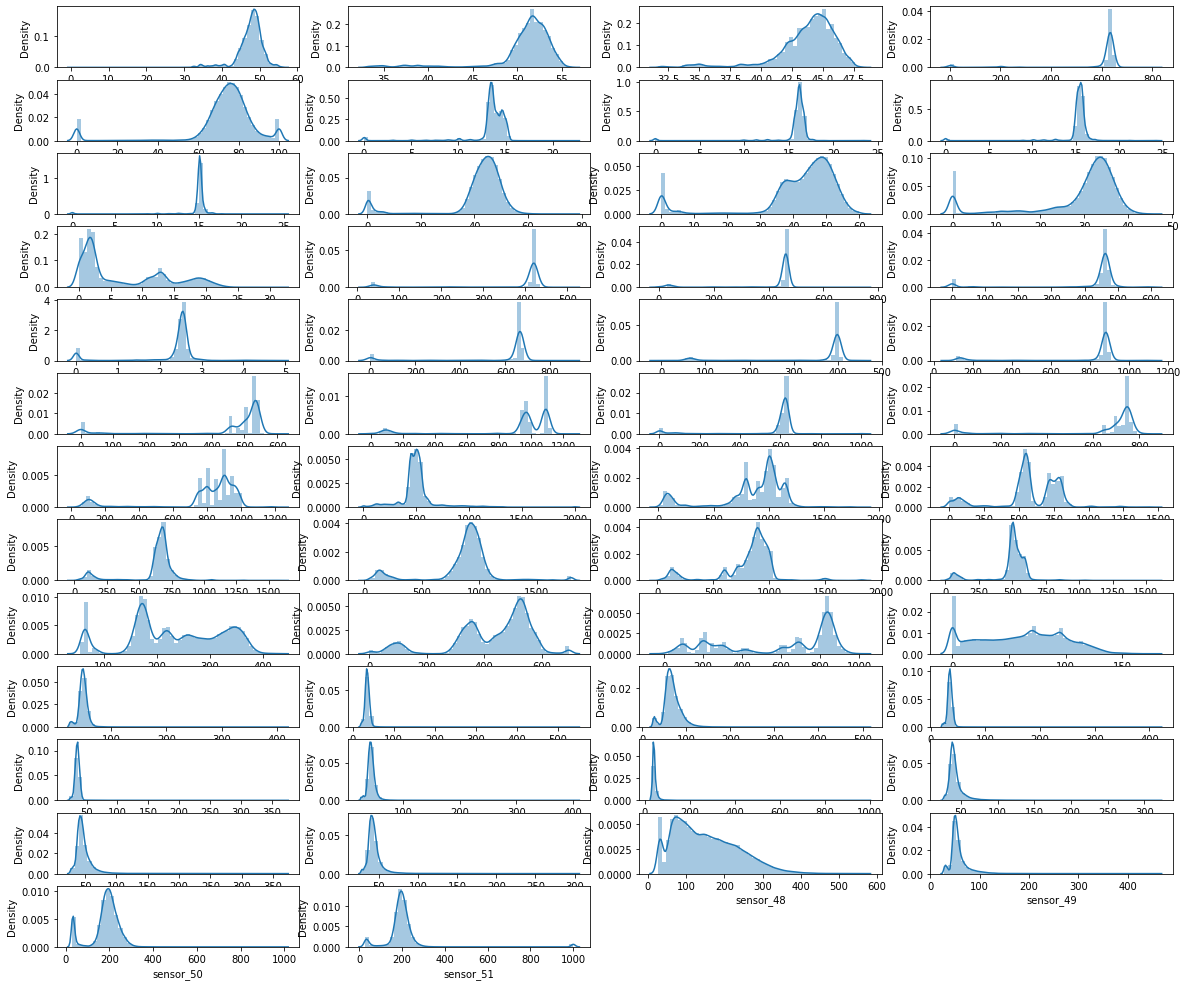

In [12]:
cols = df.columns[2:-1]
plt.figure(figsize=(20,20))
icount =1
for col in cols:
    plt.subplot(15,4, icount)
    sns.distplot(df[col])
    icount +=1
plt.show()

Variável objetivo. Contagem de valores por classe




In [13]:
df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

Base de dados com apenas 7 registros de falha

### Separando a coluna com o status de funcionamento

In [14]:
df_machine_status = df.pop('machine_status').to_frame()
df_machine_status_pca = df_machine_status.copy()
df_machine_status.head()

,machine_status
0,NORMAL
1,NORMAL
2,NORMAL
3,NORMAL
4,NORMAL


###Removendo coluna timestamp
Coluna com o timestamp tem pouco valor. Tratar os dados como uma sequencia pode trazer mais valor para solução

In [15]:
df = df.iloc[: , 1:]

###Tratamento valores ausentes



In [16]:
percAunsentes = df.isnull().sum()/df.shape[0]
maiorque1 = percAunsentes[percAunsentes > 0.01]
print(f'Existem {maiorque1.shape[0]:d} variáveis com mais de 1% de dados ausentes: {list(maiorque1.index)} \nEstas variáveis serão removidas')


Existem 7 variáveis com mais de 1% de dados ausentes: ['sensor_00', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_50', 'sensor_51'] 
Estas variáveis serão removidas


In [17]:
df = df.drop(list(maiorque1.index), axis=1)
df.head()

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49
0,47.09201,53.2118,46.310760,634.3750,76.45975,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834
1,47.09201,53.2118,46.310760,634.3750,76.45975,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834
2,47.35243,53.2118,46.397570,638.8889,73.54598,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963
3,47.09201,53.1684,46.397568,628.1250,76.98898,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028
4,47.13541,53.2118,46.397568,636.4583,76.58897,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093


Os demais valores ausentes serão substituídos pela média.

In [18]:
for col in df.columns:
  df[col].fillna((df[col].mean()), inplace=True)
df.isnull().sum()/df.shape[0]

sensor_01    0.0
sensor_02    0.0
sensor_03    0.0
sensor_04    0.0
sensor_05    0.0
sensor_10    0.0
sensor_11    0.0
sensor_12    0.0
sensor_13    0.0
sensor_14    0.0
sensor_16    0.0
sensor_17    0.0
sensor_18    0.0
sensor_19    0.0
sensor_20    0.0
sensor_21    0.0
sensor_22    0.0
sensor_23    0.0
sensor_24    0.0
sensor_25    0.0
sensor_26    0.0
sensor_27    0.0
sensor_28    0.0
sensor_29    0.0
sensor_30    0.0
sensor_31    0.0
sensor_32    0.0
sensor_33    0.0
sensor_34    0.0
sensor_35    0.0
sensor_36    0.0
sensor_37    0.0
sensor_38    0.0
sensor_39    0.0
sensor_40    0.0
sensor_41    0.0
sensor_42    0.0
sensor_43    0.0
sensor_44    0.0
sensor_45    0.0
sensor_46    0.0
sensor_47    0.0
sensor_48    0.0
sensor_49    0.0
dtype: float64

###Normalizando dados

In [19]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)

In [20]:
df.head()

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49
0,0.830145,0.876660,0.884816,0.792242,0.764598,0.489146,0.792070,0.691492,0.053911,0.828001,0.624378,0.777214,0.526401,0.757067,0.888793,0.775172,0.839800,0.795022,0.627674,0.883441,0.687219,0.214519,0.425121,0.466899,0.371528,0.370968,0.369881,0.271759,0.315796,0.492317,0.196379,0.516428,0.040397,0.023153,0.096328,0.025424,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853
1,0.830145,0.876660,0.884816,0.792242,0.764598,0.489146,0.792070,0.691492,0.053911,0.828001,0.624378,0.777214,0.526401,0.757067,0.888793,0.775172,0.839800,0.795022,0.627674,0.883441,0.687219,0.214519,0.425121,0.466899,0.371528,0.370968,0.369881,0.271759,0.315796,0.492317,0.196379,0.516428,0.040397,0.023153,0.096328,0.025424,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853
2,0.834736,0.876660,0.890052,0.797904,0.735461,0.497561,0.802954,0.713088,0.054781,0.830724,0.625597,0.766061,0.513017,0.758004,0.890922,0.775590,0.843956,0.800556,0.631133,0.882355,0.688781,0.227120,0.421517,0.487833,0.413484,0.392962,0.377674,0.276568,0.310520,0.494177,0.202392,0.536904,0.043046,0.022660,0.094199,0.024120,0.027367,0.044746,0.013959,0.132874,0.072330,0.039791,0.242162,0.092531
3,0.830145,0.874763,0.890052,0.784402,0.769891,0.506916,0.810935,0.703827,0.050643,0.830513,0.625756,0.768143,0.514958,0.757763,0.889057,0.774076,0.840053,0.796498,0.625408,0.880531,0.686952,0.237437,0.422027,0.470622,0.428819,0.411437,0.371481,0.279739,0.301123,0.495276,0.194447,0.577701,0.044371,0.023153,0.099521,0.024120,0.026627,0.042712,0.013662,0.130905,0.072330,0.039791,0.242162,0.091870
4,0.830910,0.876660,0.890052,0.794855,0.765891,0.518868,0.817716,0.710045,0.053990,0.828680,0.623854,0.780368,0.534507,0.754577,0.892260,0.777728,0.839204,0.797983,0.627183,0.878544,0.686235,0.204408,0.425142,0.480374,0.394676,0.417889,0.381845,0.271889,0.296404,0.489522,0.195168,0.581493,0.046358,0.023153,0.109101,0.025424,0.026627,0.044068,0.013365,0.131890,0.074012,0.041885,0.246487,0.091210


## Testes de Algoritmos


Função que executa os algoritmos de clusterização

In [21]:
def get_clusters(data, algorithm, args, kwds):
  start_time = time.time()
  labels = algorithm(*args, **kwds).fit_predict(data)
  end_time = time.time()
  print('Tempo de processamento: {:.2f} s'.format(end_time - start_time))
  print('Numero de clusters: {:d}) '.format(np.unique(labels).max()+1))
  return labels


### Algoritmo KMeans

Teste com o algoritmo KMenas com 10, 100 e 200 clusters. 

In [ ]:
labels = get_clusters(df, cluster.KMeans, (), {'n_clusters':10})
df_machine_status['KMeans-10'] = labels

Tempo de processamento: 17.51 s
Numero de clusters: 10) 


In [ ]:
df_machine_status.groupby(["KMeans-10", "machine_status"]).size()

KMeans-10  machine_status
0          BROKEN                2
           NORMAL            38515
           RECOVERING           14
1          NORMAL            19497
2          NORMAL            13182
3          BROKEN                1
           NORMAL             2251
           RECOVERING         7887
4          NORMAL            38282
5          NORMAL            42393
           RECOVERING           41
6          NORMAL               41
           RECOVERING         6392
7          BROKEN                3
           NORMAL            44421
           RECOVERING           19
8          BROKEN                1
           NORMAL             2874
           RECOVERING          102
9          NORMAL             4380
           RECOVERING           22
dtype: int64

In [ ]:
labels = get_clusters(df, cluster.KMeans, (), {'n_clusters':100})
df_machine_status['KMeans-100'] = labels

Tempo de processamento: 162.04 s
Numero de clusters: 100) 


In [ ]:
labels = get_clusters(df, cluster.KMeans, (), {'n_clusters':200})
df_machine_status['KMeans-200'] = labels

Tempo de processamento: 318.88 s
Numero de clusters: 200) 


In [ ]:
df_machine_status.to_csv(r"/content/drive/My Drive/BI Master/Trabalho Final/output/cluster-result.csv")


In [ ]:
df_machine_status.head()

,machine_status,KMeans-10,KMeans-100,KMeans-200
0,NORMAL,7,90,66
1,NORMAL,7,90,66
2,NORMAL,7,90,66
3,NORMAL,7,90,66
4,NORMAL,7,90,66


##Testes com Redução de Dimensionalidade

Aplicação de PCA na base de dados e utilização de 3 componentes principais

In [25]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

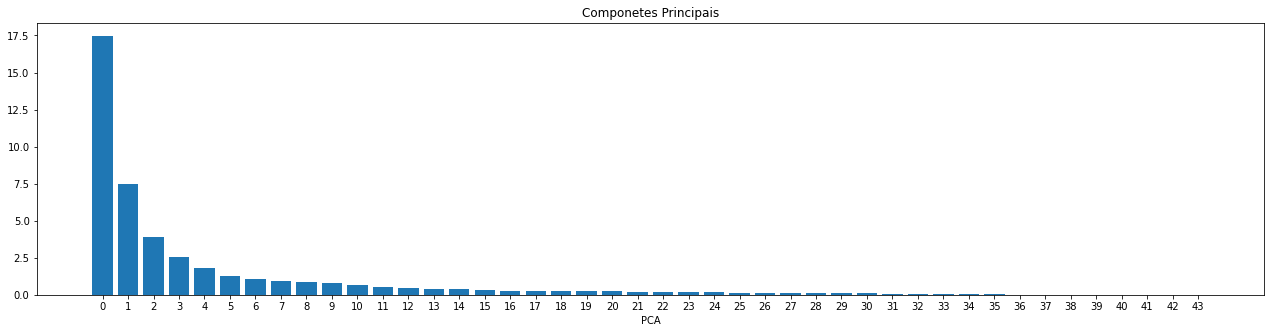

In [27]:


features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA')
_ = plt.xticks(features)
_ = plt.title("Componetes Principais")
plt.show()



In [ ]:
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(df)
df_pca = pd.DataFrame(data = principalComponents_breast, columns = ['PC0', 'PC1','PC2'])


In [ ]:
df_pca.to_csv(r"/content/drive/My Drive/BI Master/Trabalho Final/output/pca-data.csv")

In [ ]:
df_pca.head()

,PC0,PC1,PC2
0,-0.007543,0.026688,-0.532230
1,-0.007543,0.026688,-0.532230
2,-0.019496,0.016363,-0.552542
3,-0.010636,0.024393,-0.575779
4,-0.012581,0.012128,-0.588826


###Algortimo KMeans

Teste com o algoritmo KMeans com 10, 100 e 200 clusters utilizando os dados com redução de dimensionalidade

In [ ]:
labels = get_clusters(df_pca, cluster.KMeans, (), {'n_clusters':10})
df_machine_status_pca['KMeans-10'] = labels
labels = get_clusters(df_pca, cluster.KMeans, (), {'n_clusters':100})
df_machine_status_pca['KMeans-100'] = labels
labels = get_clusters(df_pca, cluster.KMeans, (), {'n_clusters':200})
df_machine_status_pca['KMeans-200'] = labels

Tempo de processamento: 10.38 s
Numero de clusters: 10) 
Tempo de processamento: 92.76 s
Numero de clusters: 100) 
Tempo de processamento: 203.85 s
Numero de clusters: 200) 


In [ ]:
df_machine_status_pca.groupby(["KMeans-200", "machine_status"]).size()

KMeans-200  machine_status
0           NORMAL             874
1           NORMAL             523
2           NORMAL               3
            RECOVERING        1963
3           NORMAL            2507
                              ... 
196         NORMAL            2659
            RECOVERING           1
197         NORMAL              70
198         NORMAL             633
199         NORMAL            2430
Length: 248, dtype: int64

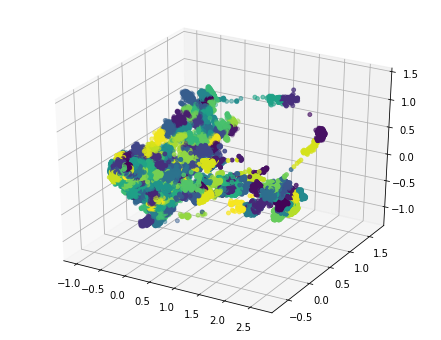

In [ ]:
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df_pca['PC0'], df_pca['PC1'], df_pca['PC2'], c=df_machine_status_pca['KMeans-200'], s=15)

###Algortimo MeanShift

Teste com o algoritmo Meanshift utilizando os dados com redução de dimensionalidade

In [ ]:
labels = get_clusters(df_pca, cluster.MeanShift, (0.175,), {'cluster_all':False})
df_machine_status_pca['MeanShift-175'] = labels

Tempo de processamento: 8832.65 s
Numero de clusters: 59) 


In [ ]:
df_machine_status_pca.groupby(["MeanShift-175", "machine_status"]).size()

MeanShift-175  machine_status
-1             BROKEN                5
               NORMAL            47302
               RECOVERING         2804
 0             NORMAL            60483
 1             NORMAL            30663
                                 ...  
 54            NORMAL                5
 55            RECOVERING            3
 56            NORMAL                1
 57            NORMAL                1
 58            NORMAL                1
Length: 74, dtype: int64

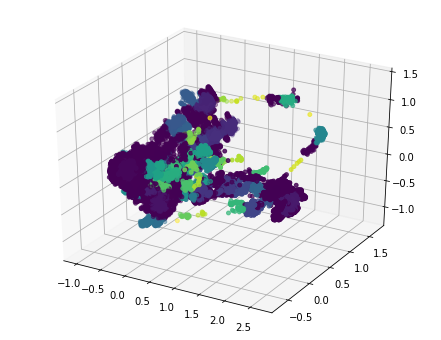

In [ ]:
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df_pca['PC0'], df_pca['PC1'], df_pca['PC2'], c=df_machine_status_pca['MeanShift-175'], s=15)

In [ ]:
labels = get_clusters(df_pca, cluster.MeanShift, (0.05,), {'cluster_all':False})
df_machine_status_pca['MeanShift-05'] = labels

Tempo de processamento: 9243.13 s
Numero de clusters: 793) 


In [ ]:
df_machine_status_pca.groupby(["MeanShift-05", "machine_status"]).size()

MeanShift-05  machine_status
-1            BROKEN                 3
              NORMAL            151096
              RECOVERING          5385
 0            NORMAL              5469
 1            NORMAL              4774
                                 ...  
 788          NORMAL                 1
 789          NORMAL                 1
 790          NORMAL                 1
 791          NORMAL                 1
 792          NORMAL                 1
Length: 836, dtype: int64

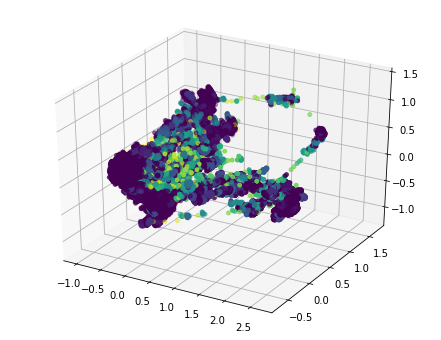

In [ ]:
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df_pca['PC0'], df_pca['PC1'], df_pca['PC2'], c=df_machine_status_pca['MeanShift-05'], s=15)

In [ ]:
labels = get_clusters(df_pca, cluster.MeanShift, (0.01,), {'cluster_all':False})
df_machine_status_pca['MeanShift-01'] = labels

Tempo de processamento: 768.88 s
Numero de clusters: 39449) 


In [ ]:
df_machine_status_pca.groupby(["MeanShift-01", "machine_status"]).size()

MeanShift-01  machine_status
-1            BROKEN                1
              NORMAL            20482
              RECOVERING         2202
 0            NORMAL               98
 1            NORMAL               67
                                ...  
 39444        NORMAL                1
 39445        NORMAL                1
 39446        NORMAL                1
 39447        NORMAL                1
 39448        NORMAL                1
Length: 39592, dtype: int64

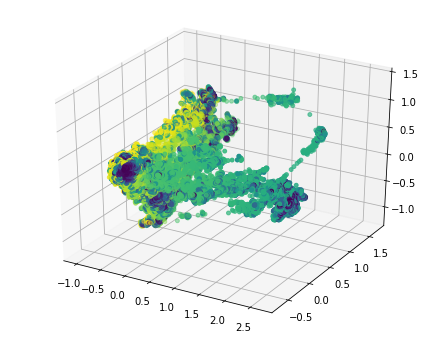

In [ ]:
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df_pca['PC0'], df_pca['PC1'], df_pca['PC2'], c=df_machine_status_pca['MeanShift-01'], s=15)

In [ ]:
df_machine_status_pca.to_csv(r"/content/drive/My Drive/BI Master/Trabalho Final/output/cluster-result-pca.csv")